<a href="https://colab.research.google.com/github/vishalsiram/Covid-19-Dashboard/blob/master/Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/crowdai/crowdai-mapping-challenge-mask-rcnn

Cloning into 'crowdai-mapping-challenge-mask-rcnn'...
remote: Enumerating objects: 579, done.
remote: Total 579 (delta 0), reused 0 (delta 0), pack-reused 579
Receiving objects: 100% (579/579), 82.01 MiB | 22.65 MiB/s, done.
Resolving deltas: 100% (321/321), done.


In [2]:
import os
import sys

ROOT_DIR = os.path.abspath("/content/crowdai-mapping-challenge-mask-rcnn")
sys.path.append(ROOT_DIR)

sys.path


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/crowdai-mapping-challenge-mask-rcnn']

In [4]:
pip install -r /content/crowdai-mapping-challenge-mask-rcnn/requirements.txt

In [5]:

import os
import sys
import time
import numpy as np
import skimage.io

# Download and install the Python COCO tools from https://github.com/waleedka/coco
# That's a fork from the original https://github.com/pdollar/coco with a bug
# fix for Python 3.
# I submitted a pull request https://github.com/cocodataset/cocoapi/pull/50
# If the PR is merged then use the original repo.
# Note: Edit PythonAPI/Makefile and replace "python" with "python3".
#  
# A quick one liner to install the library 
# !pip install git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils

import coco #a slightly modified version

from mrcnn.evaluate import build_coco_results, evaluate_coco
from mrcnn.dataset import MappingChallengeDataset
from mrcnn import visualize


import zipfile
import urllib.request
import shutil
import glob
import tqdm
import random

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
ROOT_DIR1 = ROOT_DIR
ROOT_DIR1


'/content/crowdai-mapping-challenge-mask-rcnn'

In [26]:
ROOT_DIR1 = ROOT_DIR

# Import Mask RCNN
sys.path.append(ROOT_DIR1)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils


PRETRAINED_MODEL_PATH = os.path.join(ROOT_DIR1,"/content/pretrained_weights.h5")
LOGS_DIRECTORY = os.path.join(ROOT_DIR1, "logs")
MODEL_DIR = os.path.join(ROOT_DIR1, "logs")
#IMAGE_DIR = os.path.join("/content/imag", "data", "test", "images")

In [34]:
IMAGE_DIR = "/content/imag"
IMAGE_DIR

'/content/imag'

In [27]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5
    NUM_CLASSES = 1 + 1  # 1 Background + 1 Building
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320
    NAME = "crowdai-mapping-challenge"
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     5
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 5
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           crowdai-mapping-challenge
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS_ROIS_INFERENC

In [28]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model_path = PRETRAINED_MODEL_PATH

# or if you want to use the latest trained model, you can use : 
# model_path = model.find_last()[1]

model.load_weights(model_path, by_name=True)

In [36]:
class_names = ['BG', 'building', 'car']

Processing 5 images
image                    shape: (1724, 2296, 3)       min:    1.00000  max:  255.00000  uint8
image                    shape: (1724, 2296, 3)       min:    1.00000  max:  255.00000  uint8
image                    shape: (1724, 2296, 3)       min:    1.00000  max:  255.00000  uint8
image                    shape: (1724, 2296, 3)       min:    1.00000  max:  255.00000  uint8
image                    shape: (1724, 2296, 3)       min:    1.00000  max:  255.00000  uint8
molded_images            shape: (5, 320, 320, 3)      min: -123.70000  max:  145.10000  float64
image_metas              shape: (5, 14)               min:    0.00000  max: 2296.00000  float64
anchors                  shape: (5, 25575, 4)         min:   -1.13492  max:    1.93429  float32


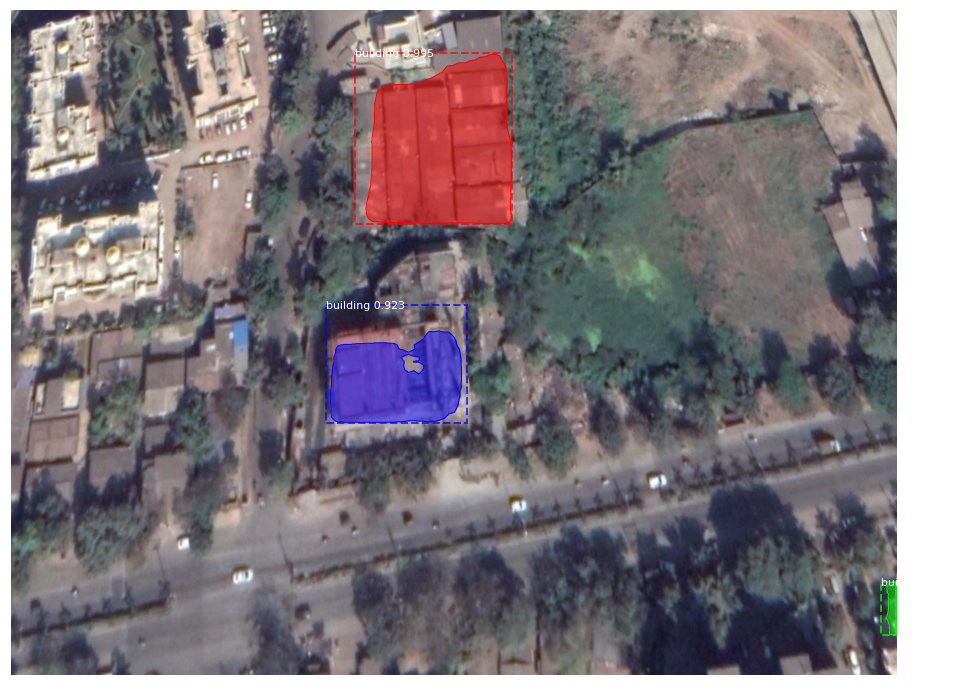

In [42]:
file_names = next(os.walk(IMAGE_DIR))[2]
random_image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

predictions = model.detect([random_image]*config.BATCH_SIZE, verbose=1) # We are replicating the same image to fill up the batch_size

p = predictions[0]
visualize.display_instances(random_image, p['rois'], p['masks'], p['class_ids'], 
                            class_names, p['scores'])